# Capstone Project : Mahindra First Choice


### Problem Statement
Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24 states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network of over 400 workshops by March 2018.
Mahindra would now like to leverage the data that they have and address the key issues they have. Read along to know how you can help them improve their business.
The dataset consist of three aspects:
* Customer data: where the details of the customer like the car owned, state and place of residence, order type, etc are present. Data dimension is of 534000 Customer entries
* Invoice data: where information related to customer visits and transactions are recorded, whether a customer as insurance claims, bifurcation of the amount 
 paid, for what type of service did the customer came for, etc…
* Material Inventory: where information related to what kind of service did the customer took and what kind of material was used to service, Labor information and the cost for the service, Plant and plant name where the customer took the service.


### Objective

### Geolocation Based Customer Analysis:
The idea is to explore how various factors like car make & model, time and type of service etc. vary with location. Since the servicing industry is local in nature, this kind of an analysis could possibly render some really interesting business insights.
Furthermore, this analysis will enable us to formulate more concrete machine learning problems.
From the data at hand it is possible to extract insights about customer behaviour especially the following questions can be addressed

#### Problem Statement-1
Identifying the ownership pattern of cars throughout the country. This also captures the problem wherein information regarding the spending patterns can be identified Expected Business Outcome: Mahindra First Choice Services will be benefited in multiple ways. Knowing the ownership pattern targeted marketing campaigns could be carried out. Knowing the spending patterns services could be suited to the particular spending pattern.

#### Problem Statement-2
Identify the type of order each state receives and present it as an interactive visualization. Expected Business Outcome: This could potentially give information about how Mahindra First Choice needs to be prepared to tackle various seasonal cases

### Market Segmentation: [Solved in this Notebook]
Market segmentation is the process of dividing a market of potential customers into internally homogeneous and mutually heterogeneous groups or segments, based on different characteristics captured in the data. Groups created through such a segmentation exercise many times reveal behavioral patterns which are different from generally accepted segments by the business. The exercise is broadly known as “clustering” and is aimed at finding the consumers who will respond similarly to various stimuli by detecting underlying behavior patterns.
Though clustering falls under a Machine Learning problem category called unsupervised learning, which requires extensive efforts, it is possible to carry out a visual analysis in a relatively short timespan.

#### Problem Statement: 
Customer Lifetime value prediction - Based on Customer segments, predict the revenue that can be extracted from each segment over a life of the car -Regression/Time Series.


#### Why are we doing this
- To Help Mahindra improve its business from analysing the data given like max. car model coming for repair location-wise, top sales garage etc
- To Identify more profitable area or expansion in other regions

#### Stakeholders:
- Marketing Head of Mahindra First [For Marketing Campaign]
- Operational Head/State Head of Mahindra First [For knowing In-Outs operation in Garage]
- Project Manager [i.e. Our Consulting Firm Manager - To which Mahindra First Company are first point of contact with for Analysis]

## Table Of Contents

### 1. <a href="#Importing-Libraries">Libraries Imported </a> 
### 2. <a href="#Import-DataSet">Import DataSet </a>
### 3. <a href="#Clustering-Customer-Based-on-Spending-Pattern">Clustering based on Spending Customer</a>

## Start of Notebook

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly
import plotly.graph_objects as go
import re
import pgeocode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [5]:
 # Some tweaks for displaying large rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
# If DataSet lies in another Directory
#os.getcwd()
os.chdir("C:\\Users\\Dashang\\Documents\\GreyAtom_Capstone_MahindraFirst\\") 

## Import DataSet

In [8]:
df = pd.read_csv("invoice_final.csv")   ## Pre-Cleaned DataSet

In [9]:
df["invoice_datetime"] = pd.to_datetime(df["invoice_datetime"],dayfirst=True)

In [10]:
df["invoice_datetime"] = pd.to_datetime(df["invoice_datetime"],dayfirst=True)
df["jobcard_datetime"] = pd.to_datetime(df["jobcard_datetime"],dayfirst=True)
df['Service_Time']     = abs(df['invoice_datetime'] - df['jobcard_datetime'])
df['service_time_hrs'] = df['Service_Time']/np.timedelta64(1,'h')

In [13]:
df.head()

,model,customer_type,customer_no,gate_pass_time,invoice_no,job_card_no,km_reading,labour_total,make,order_type,pin_code,plant_code,plant_name,regn_no,total_amt,user_id,pin_city,pin_district,pin_location,latitude,longitude,state,zones,invoice_datetime,jobcard_datetime,Service_Time,model_type,service_time_hrs
0,spark,retail,67849,0:00:00,7005200002,168303,49317,1203.14,general motors,paid service,400601,bc01,thane,ka19ma1291,4051.95,bc01fs1,Thane,Maharashtra,"Thane Bazar, Thane H.O, Thane R.S.",19.1941,73.0002,maharashtra,west zone,2015-02-01 11:30:00,2014-12-13 14:29:00,49 days 21:01:00,hatchback,1197.016667
1,indica,retail,84419,0:00:00,7005200003,173997,78584,804.26,tata motors,smc value package,400603,bc01,thane,mh43r3046,1001.29,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 10:07:00,2015-02-01 14:12:00,27 days 19:55:00,hatchback,667.916667
2,zen,retail,81055,0:00:00,7005200004,173889,33985,180.19,maruti suzuki,running repairs,400607,bc01,thane,ap09ax0582,233.14,bc01sa2,Thane,Maharashtra,"Chitalsar Manpada, Sandozbaugh",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:12:00,2015-02-01 11:40:00,27 days 23:32:00,hatchback,671.533333
3,indica,retail,84419,0:00:00,7005200005,174158,78584,0.00,tata motors,smc redemption,400603,bc01,thane,mh43r3046,0.00,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:40:00,2015-03-01 10:12:00,0 days 01:28:00,hatchback,1.466667
4,santro xing,retail,18980,0:00:00,7005200006,173860,50057,1202.97,hyundai,paid service,400603,bc01,thane,mh04cd9768,2747.12,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 12:07:00,2015-02-01 10:45:00,28 days 01:22:00,hatchback,673.366667


In [12]:
df.columns

Index(['model', 'customer_type', 'customer_no', 'gate_pass_time', 'invoice_no', 'job_card_no', 'km_reading', 'labour_total', 'make', 'order_type', 'pin_code', 'plant_code', 'plant_name', 'regn_no', 'total_amt', 'user_id', 'pin_city', 'pin_district', 'pin_location', 'latitude', 'longitude', 'state', 'zones', 'invoice_datetime', 'jobcard_datetime', 'Service_Time', 'model_type', 'service_time_hrs'], dtype='object')

In [14]:
df1 = df[['customer_type','customer_no','make','model','order_type','pin_city','pin_location','invoice_no','service_time_hrs','total_amt']]

In [15]:
df1.isnull().sum()

customer_type       0
customer_no         0
make                0
model               0
order_type          0
pin_city            0
pin_location        0
invoice_no          0
service_time_hrs    0
total_amt           0
dtype: int64

In [17]:
main_cluster = df1.groupby(['customer_no','customer_type','make','model','pin_city','order_type']).agg(
                                {
                                 'invoice_no':'nunique',
                                 'total_amt':'sum',
                                 'service_time_hrs':'mean'
                                }
                            )

In [18]:
main_cluster.head()

invoice_no  total_amt  service_time_hrs
customer_no customer_type make           model   pin_city order_type                                              
1           retail        maruti suzuki  kizashi Pune     paid service              1       0.00       5869.083333
                                         omni    Pune     paid service              2       0.00       3370.041667
                                                          running repairs           1       0.00        321.366667
10          retail        general motors optra   Mumbai   paid service              4   10505.72        370.050000
                                                          running repairs           1     599.84          3.066667

In [20]:
main_cluster_reset_index=main_cluster.reset_index()

In [24]:
main_cluster_reset_index.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs
0,1,retail,maruti suzuki,kizashi,Pune,paid service,1,0.00,5869.083333
1,1,retail,maruti suzuki,omni,Pune,paid service,2,0.00,3370.041667
2,1,retail,maruti suzuki,omni,Pune,running repairs,1,0.00,321.366667
3,10,retail,general motors,optra,Mumbai,paid service,4,10505.72,370.050000
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667


### Clustering Customer Based on Spending Pattern

In [22]:
income_cluster = main_cluster_reset_index[main_cluster_reset_index['total_amt']>0]

In [25]:
print("0.05 quantile :-",income_cluster['service_time_hrs'].quantile(0.05))
print("0.25 quantile :-",income_cluster['service_time_hrs'].quantile(0.25))
print("0.50 quantile :-",income_cluster['service_time_hrs'].quantile(0.50))
print("0.75 quantile :-",income_cluster['service_time_hrs'].quantile(0.75))
print("0.95 quantile :-",income_cluster['service_time_hrs'].quantile(0.95))
print("mimimum servicing time in hrs :-",income_cluster['service_time_hrs'].min())
print("maximum servicing time in hrs :-",income_cluster['service_time_hrs'].max())
print("mean servicing time in hrs :-",income_cluster['service_time_hrs'].mean())

0.05 quantile :- 0.23333333333333334
0.25 quantile :- 3.3833333333333333
0.50 quantile :- 24.1
0.75 quantile :- 452.7825
0.95 quantile :- 3305.8716666666655
mimimum servicing time in hrs :- 0.0
maximum servicing time in hrs :- 18869.066666666666
mean servicing time in hrs :- 557.6629086833316


In [32]:
income_cluster['cluster']="none"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
income_cluster.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs,cluster
3,10,retail,general motors,optra,Mumbai,paid service,4,10505.72,370.050000,none
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667,none
5,100,retail,honda,city,Mumbai,accidental,1,14167.07,2954.983333,none
6,100,retail,honda,city,Mumbai,paid service,1,6632.67,1465.800000,none
7,1000,retail,maruti suzuki,alto,Pune,paid service,4,7617.27,4.691667,none


In [34]:
# Low sales customers (less than 0.50 quantile)
low_sales = income_cluster[(income_cluster['total_amt']< income_cluster['total_amt'].quantile(0.50))]

# Medium sales customers (between 0.50 to 0.75 quantile)
medium_sales = income_cluster[
                            (income_cluster['total_amt'] > income_cluster['total_amt'].quantile(0.50)) & 
                            (income_cluster['total_amt']< income_cluster['total_amt'].quantile(0.75))
                         ]

# Average sales customers (between 0.75 to 0.95 quantile)
avg_sales = income_cluster[
                        (income_cluster['total_amt'] > income_cluster['total_amt'].quantile(0.75)) & 
                        (income_cluster['total_amt'] < income_cluster['total_amt'].quantile(0.95))
                      ]

# High revenue customers (moe than 0.95 quantile)
high_sales = income_cluster[
                        (income_cluster['total_amt'] > income_cluster['total_amt'].quantile(0.95))
                       ]

In [35]:
low_sales['cluster']='low_sales'
medium_sales['cluster']='medium_sales'
avg_sales['cluster']='avg_sales'
high_sales['cluster']='high_sales'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [36]:
low_sales.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs,cluster
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667,low_sales
8,1000,retail,maruti suzuki,alto,Pune,running repairs,2,1196.17,5.316667,low_sales
9,10000,retail,maruti suzuki,wagonr,Hyderabad,running repairs,4,734.23,190.841667,low_sales
11,10000,retail,maruti suzuki,wagonr,Hyderabad,smc value package,1,1001.29,3.166667,low_sales
13,100001,retail,mahindra & mahindra,bolero,Pune,running repairs,1,697.59,0.783333,low_sales


In [37]:
revenue_clust = pd.concat([low_sales,medium_sales,avg_sales,high_sales],axis=0)

In [39]:
revenue_clust.cluster.value_counts()

low_sales       161579
medium_sales     80789
avg_sales        64632
high_sales       16158
Name: cluster, dtype: int64

In [41]:
revenue_clust.groupby(['cluster']).agg({'total_amt':'mean','service_time_hrs':'mean','customer_no':'count'}).sort_values('total_amt',ascending=False)

,total_amt,service_time_hrs,customer_no
cluster,,,
high_sales,54069.440319,1333.787409,16158
avg_sales,12422.207087,936.773847,64632
medium_sales,4218.437342,574.879789,80789
low_sales,905.952703,319.796278,161579


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


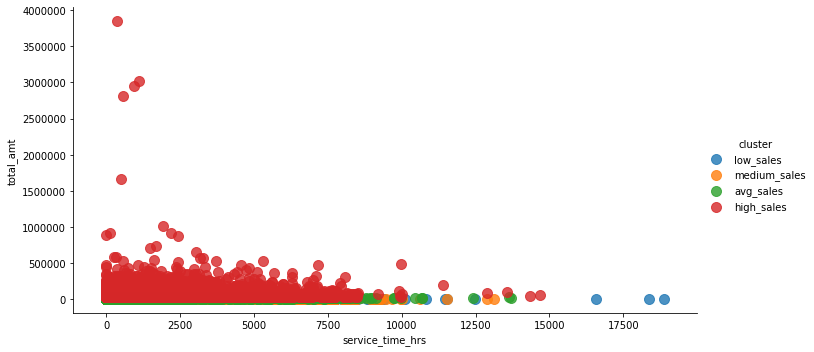

In [42]:
import seaborn as sns
sns.lmplot(data=revenue_clust,x='service_time_hrs', y='total_amt', hue='cluster', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

### Servicing Time based Clusters

In [48]:
# super fast service (less than 0.50 quantile)
very_fast = income_cluster[income_cluster['service_time_hrs']< income_cluster['service_time_hrs'].quantile(0.50)]

# fast service (between 0.50 to 0.75 quantile)
fast = income_cluster[
                (income_cluster['service_time_hrs']> income_cluster['service_time_hrs'].quantile(0.50)) & 
                (income_cluster['service_time_hrs']< income_cluster['service_time_hrs'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow = income_cluster[
                (income_cluster['service_time_hrs'] > income_cluster['service_time_hrs'].quantile(0.75)) & 
                (income_cluster['service_time_hrs'] < income_cluster['service_time_hrs'].quantile(0.95))
                ]

# super slow service (more than 0.95 quantile)
very_slow = income_cluster[
                        income_cluster['service_time_hrs'] > income_cluster['service_time_hrs'].quantile(0.95)
                     ]


In [49]:
very_fast['cluster'] = 'very_fast'
fast['cluster'] = 'fast'
slow['cluster'] = 'slow'
very_slow['cluster'] = 'very_slow'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [50]:
very_fast.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs,cluster
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667,very_fast
7,1000,retail,maruti suzuki,alto,Pune,paid service,4,7617.27,4.691667,very_fast
8,1000,retail,maruti suzuki,alto,Pune,running repairs,2,1196.17,5.316667,very_fast
11,10000,retail,maruti suzuki,wagonr,Hyderabad,smc value package,1,1001.29,3.166667,very_fast
12,100000,retail,hyundai,accent,Surat,accidental,1,6026.05,4.666667,very_fast


In [51]:
c1 = pd.concat([very_fast,fast,slow,very_slow],axis=0)

In [53]:
c1.groupby(['cluster']).agg({'total_amt':'mean','service_time_hrs':'mean','customer_no':'count'}).sort_values('service_time_hrs',ascending=False)

,total_amt,service_time_hrs,customer_no
cluster,,,
very_slow,12585.313901,4857.928250,16158
slow,12742.084588,1409.803587,64632
fast,8982.038705,121.438079,80771
very_fast,2544.707470,4.894745,161558


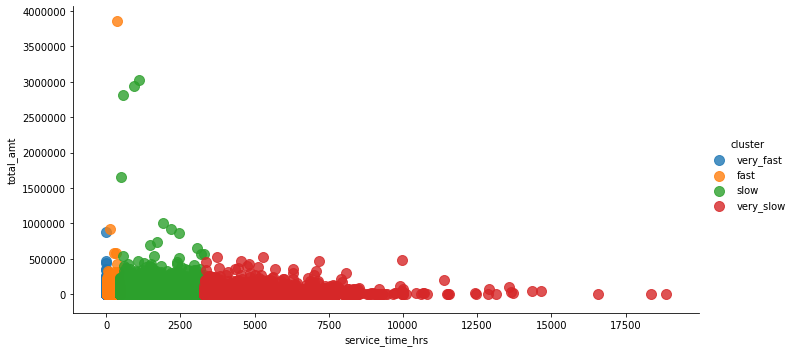

In [55]:
import seaborn as sns
sns.lmplot(data=c1,x='service_time_hrs', y='total_amt', hue='cluster', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

### K-means Clustering

In [64]:
income_cluster = income_cluster.drop(['cluster'],axis=1)

In [65]:
final = income_cluster

In [66]:
final.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs
3,10,retail,general motors,optra,Mumbai,paid service,4,10505.72,370.050000
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667
5,100,retail,honda,city,Mumbai,accidental,1,14167.07,2954.983333
6,100,retail,honda,city,Mumbai,paid service,1,6632.67,1465.800000
7,1000,retail,maruti suzuki,alto,Pune,paid service,4,7617.27,4.691667


In [67]:
X = final.drop(['customer_no'],axis=1)

In [68]:
le=LabelEncoder()
X["make"]=le.fit_transform(X["make"])
X["model"]=le.fit_transform(X["model"])
X["pin_city"]=le.fit_transform(X["pin_city"])
# final_cluster["Clean_Location_Area"]=le.fit_transform(final_cluster["Clean_Location_Area"])
X["customer_type"]=le.fit_transform(X["customer_type"])
X["order_type"]=le.fit_transform(X["order_type"])

### Scaling Columns

In [69]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [70]:
sdata = pd.DataFrame(X)

In [73]:
wcss=[]
for i in range(2,12):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

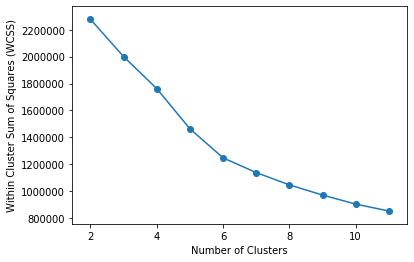

In [74]:
import matplotlib.pyplot as plt
x=np.arange(2,12)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

### Calculating silhoutte score

In [77]:
sil=[]
for j in range(2,11):
    kmeans=KMeans(n_clusters=j,init='k-means++',random_state=42)
    kmeans.fit(X)
    labels=kmeans.labels_
    centroids=kmeans.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

KeyboardInterrupt: 

In [ ]:
x=np.arange(2,11)
plt.plot(x,sil)
plt.scatter(x,sil)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [78]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [79]:
clf_final.fit(X)

KMeans(n_clusters=6, random_state=42)

In [80]:
final["Clusters"]=clf_final.predict(X)

In [81]:
final.head()

,customer_no,customer_type,make,model,pin_city,order_type,invoice_no,total_amt,service_time_hrs,Clusters
3,10,retail,general motors,optra,Mumbai,paid service,4,10505.72,370.050000,1
4,10,retail,general motors,optra,Mumbai,running repairs,1,599.84,3.066667,1
5,100,retail,honda,city,Mumbai,accidental,1,14167.07,2954.983333,0
6,100,retail,honda,city,Mumbai,paid service,1,6632.67,1465.800000,2
7,1000,retail,maruti suzuki,alto,Pune,paid service,4,7617.27,4.691667,2


In [82]:
final.to_csv('Final_Clusters.csv')

In [84]:
cluster_excel = final.groupby(["Clusters","customer_type"]).agg({"total_amt":"mean","service_time_hrs":'mean',"customer_no":"count"}).sort_values('total_amt')

In [89]:
final.groupby(["Clusters","order_type"]).agg({"total_amt":"mean","service_time_hrs":'mean',"customer_no":"count"})

total_amt  service_time_hrs  customer_no
Clusters order_type                                                    
0        accidental         3.625290e+04       3445.639986        10393
         mechanical         8.280413e+03       3850.122887         1214
         paid service       1.168730e+04       3929.403400         8666
         running repairs    1.177781e+04       4292.458968         7275
         smc redemption     2.090864e+03       4263.308712           22
         smc value package  3.848122e+03       5078.517500           70
         wbw order          1.424903e+04       6146.016667            1
1        accidental         1.389363e+04        302.806783        10433
         mechanical         3.391268e+03        194.394190         4782
         paid service       6.122311e+03        248.663719        41479
         repeat order       3.966740e+03        718.916667            1
         running repairs    4.104453e+03        235.251655        66786
         smc redemption     1.918529e+03        291.303815          420
         smc value package  4.016293e+03         48.262629         4531
         wbw order          1.041322e+04         20.030000            5
2        accidental         1.276368e+04        319.459674         9938
         mechanical         3.133537e+03        216.520439         4154
         paid service       5.194883e+03        258.799690        34909
         repeat order       4.000000e+01          4.400000            1
         running repairs    3.435304e+03        235.493762        55500
         smc redemption     1.795662e+03        285.219635          319
         smc value package  3.650968e+03         53.532566         3406
         wbw order          7.284960e+03        899.935714            7
3        accidental         3.026804e+06       1122.247573            1
         paid service       2.882405e+06        742.500565            2
         running repairs    2.754690e+06        430.233137            2
4        accidental         2.945692e+04        870.647073          102
         mechanical         1.474048e+04        848.970062            9
         paid service       3.100363e+04        817.394080          148
         running repairs    2.863315e+04        750.483445          194
         smc value package  9.170525e+03        492.797222            6
5        accidental         1.695405e+04        408.933077         5949
         mechanical         3.252396e+03        221.901672         2471
         paid service       5.964783e+03        310.842784        16470
         running repairs    3.644078e+03        263.541341        32163
         smc redemption     1.849089e+03        191.461597          135
         smc value package  3.461183e+03         87.745951         1191
         wbw order          4.656067e+03        668.827778            3

In [90]:
cluster_excel.sort_values(by='Clusters')

total_amt  service_time_hrs  customer_no
Clusters customer_type                                                
0        mfcwl             1.230044e+04       3774.784530           13
         retail            2.077473e+04       3842.869453        27628
1        retail            5.513897e+03        237.058972       128395
         mfcwl             8.082896e+03        458.894114           42
2        insurance         4.235490e+03         48.616667            1
         retail            4.849363e+03        244.300300       108194
         mfcwl             6.473341e+03        674.461859           39
3        retail            2.543249e+06        850.243656            3
         fleets            3.335623e+06        458.492005            2
4        franchise         5.285038e+03       1007.739506            9
         corporate others  2.387605e+04        573.115641          192
         fleets            3.181529e+04        907.753963          183
         corporate- m&m    3.842262e+04       1076.597250           75
5        mfcwl             5.626999e+03        423.239881           21
         retail            5.630618e+03        286.156747        58361

In [91]:
cluster_excel.to_csv('cluster_representation.csv')

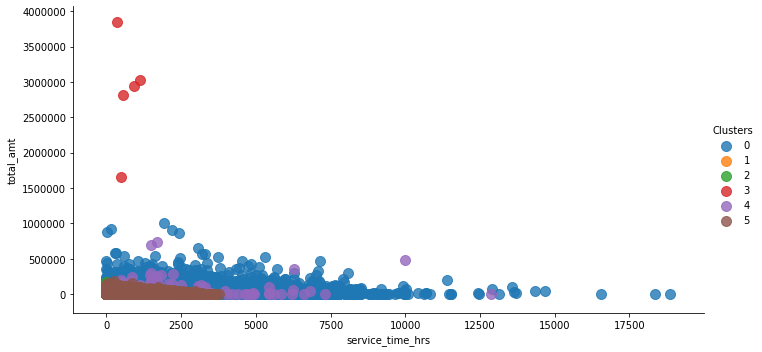

In [92]:
sns.lmplot(data=final,x='service_time_hrs', y='total_amt', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})